In [1]:
from plot import plot_set, linecolor_generator, linestyle_generator, bodeplot_set
from vertical_drive_arm_model import I_PD_control_robot

/usr/local/lib/python3.11/site-packages/control/timeresp.py:1083: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


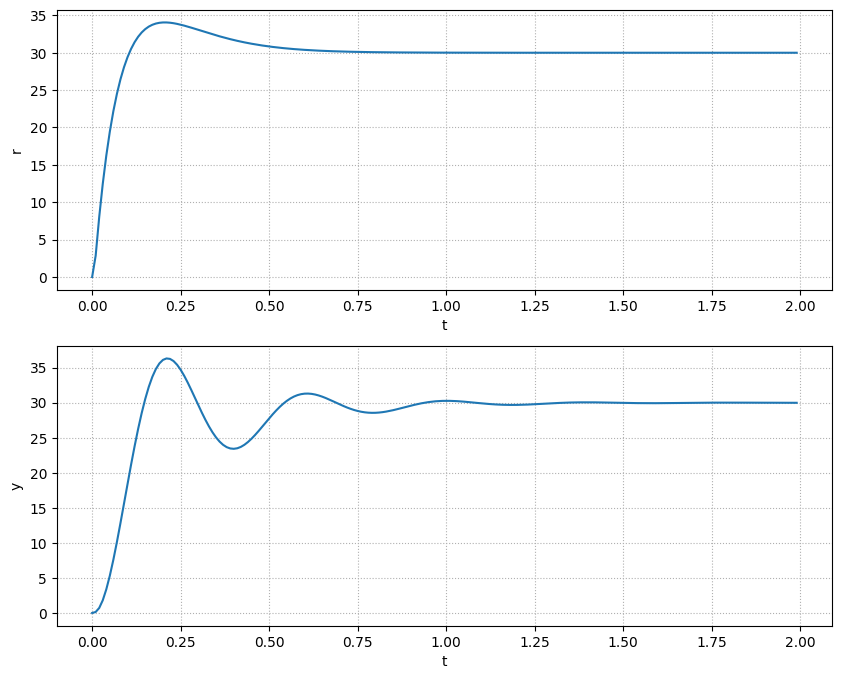

In [2]:
import numpy as np
import matplotlib.pyplot as plt

ipd = I_PD_control_robot(2, 10, 0.1)
y, t, z = ipd.excute_result_for_response(np.arange(0, 2, 0.01))

ref = 30

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(t, z*ref)
ax[1].plot(t, y*ref)
plot_set(ax[0], 't', 'r')
plot_set(ax[1], 't', 'y')

/usr/local/lib/python3.11/site-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
/root/workspace/optimize_model/plot.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig_ax[0].legend(loc=args[0])


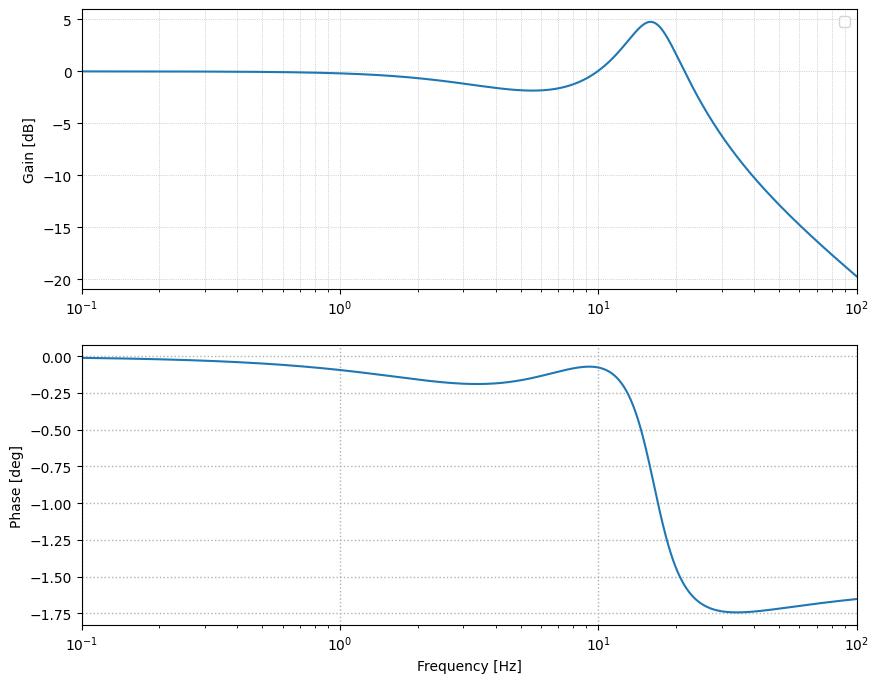

In [3]:
from control.matlab import mag2db

mag, phase, w = ipd.excute_result_bode_line_diagram()

LS = linestyle_generator()

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].semilogx(w, mag2db(mag))
ax[1].semilogx(w, phase)
bodeplot_set(ax, 'best')

In [ ]:
# define objective function.
def get_motion_stop_point(y: np.array, t: np.array, ref: float, stability_time) -> np.array:
    residual_vibration = []
    for y_i, t_i in zip(y, t):
        if y_i >= ref:
            residual_vibration.append(y_i)
        
        if t_i > stability_time:
            break

    return np.array(residual_vibration)

def compute_over_shoot(y: np.array) -> float:
    return np.max(y)

def compute_under_shoot(y: np.array) -> float:
    return np.min(y)

def objective_function(over_shoot: float, under_shoot: float, over_shoot_limit: float, under_shoot_limit: float) -> float:
    if over_shoot > over_shoot_limit and under_shoot < under_shoot_limit:
        return over_shoot - under_shoot